\begin{center}
Gabe Morris
\end{center}

In [1]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import pandas as pd

plt.style.use('../maroon_ipynb.mplstyle')

\pagebreak
\tableofcontents
\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 3613 & Homework 3 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 1
## Given

![Figure 1](f1.PNG)

$$m=10\ kg$$

$$k_1=85\ N/m,\ k_2=30\ N/m$$

$$c_1=4\ N\cdot s/m,\ c_2=3\ N\cdot s/m$$

The input force $f(t)$ is in the `data.xlsx` file.

## Find
Using the control package `tf()` function to get the forced response, find the following:

a. The equation of motion for the system.
b. The transfer function $X(s)/F(s)$.
c. The forced response for the no noise data. Plot the input force and the response on separate axes.
d. Repeat part c for the high frequency noise data.
e. Repeat part c for the low frequency noise data.

## Solution
### Part A

In [2]:
t = sp.Symbol('t')
x = sp.Function('x')(t)
f = sp.Function('f')(t)

eq = sp.Eq(10*x.diff(t, 2), f - 85*x - 30*x - 4*x.diff() - 3*x.diff())
eq

Eq(10*Derivative(x(t), (t, 2)), f(t) - 115*x(t) - 7*Derivative(x(t), t))

### Part B

In [3]:
s = sp.Symbol('s')
eq_s = sp.Eq(
    sp.laplace_transform(eq.lhs, t, s)[0],
    sp.laplace_transform(eq.rhs, t, s)[0]
)
eq_s

Eq(10*s**2*LaplaceTransform(x(t), t, s) - 10*s*x(0) - 10*Subs(Derivative(x(t), t), t, 0), -7*s*LaplaceTransform(x(t), t, s) + LaplaceTransform(f(t), t, s) - 115*LaplaceTransform(x(t), t, s) + 7*x(0))

In [4]:
eq_s = eq_s.subs([
    (x.subs(t, 0), 0),
    (x.diff().subs(t, 0), 0)
])
eq_s

Eq(10*s**2*LaplaceTransform(x(t), t, s), -7*s*LaplaceTransform(x(t), t, s) + LaplaceTransform(f(t), t, s) - 115*LaplaceTransform(x(t), t, s))

In [5]:
X = sp.solve(eq_s, sp.laplace_transform(x, t, s)[0])[0]
X

LaplaceTransform(f(t), t, s)/(10*s**2 + 7*s + 115)

In [6]:
# Transfer function
sys1 = ct.tf(1, [10, 7, 115])
sys1

TransferFunction(array([1]), array([ 10,   7, 115]))

### Part C

In [7]:
data = pd.read_excel('data.xlsx', sheet_name='Input Force Data')
data

,Time (s),High (N),Low (N),No Noise (N)
0,0.00000,-4.849845,1.076581,0.000000
1,0.02004,-1.574263,1.076581,0.400802
2,0.04008,-2.771360,1.076581,0.801603
3,0.06012,2.071162,1.076581,1.202405
4,0.08016,3.660872,1.076581,1.603206
...,...,...,...,...
495,9.91984,95.248337,95.648604,100.000000
496,9.93988,101.726636,95.648604,100.000000
497,9.95992,95.527882,95.648604,100.000000
498,9.97996,102.458740,95.648604,100.000000


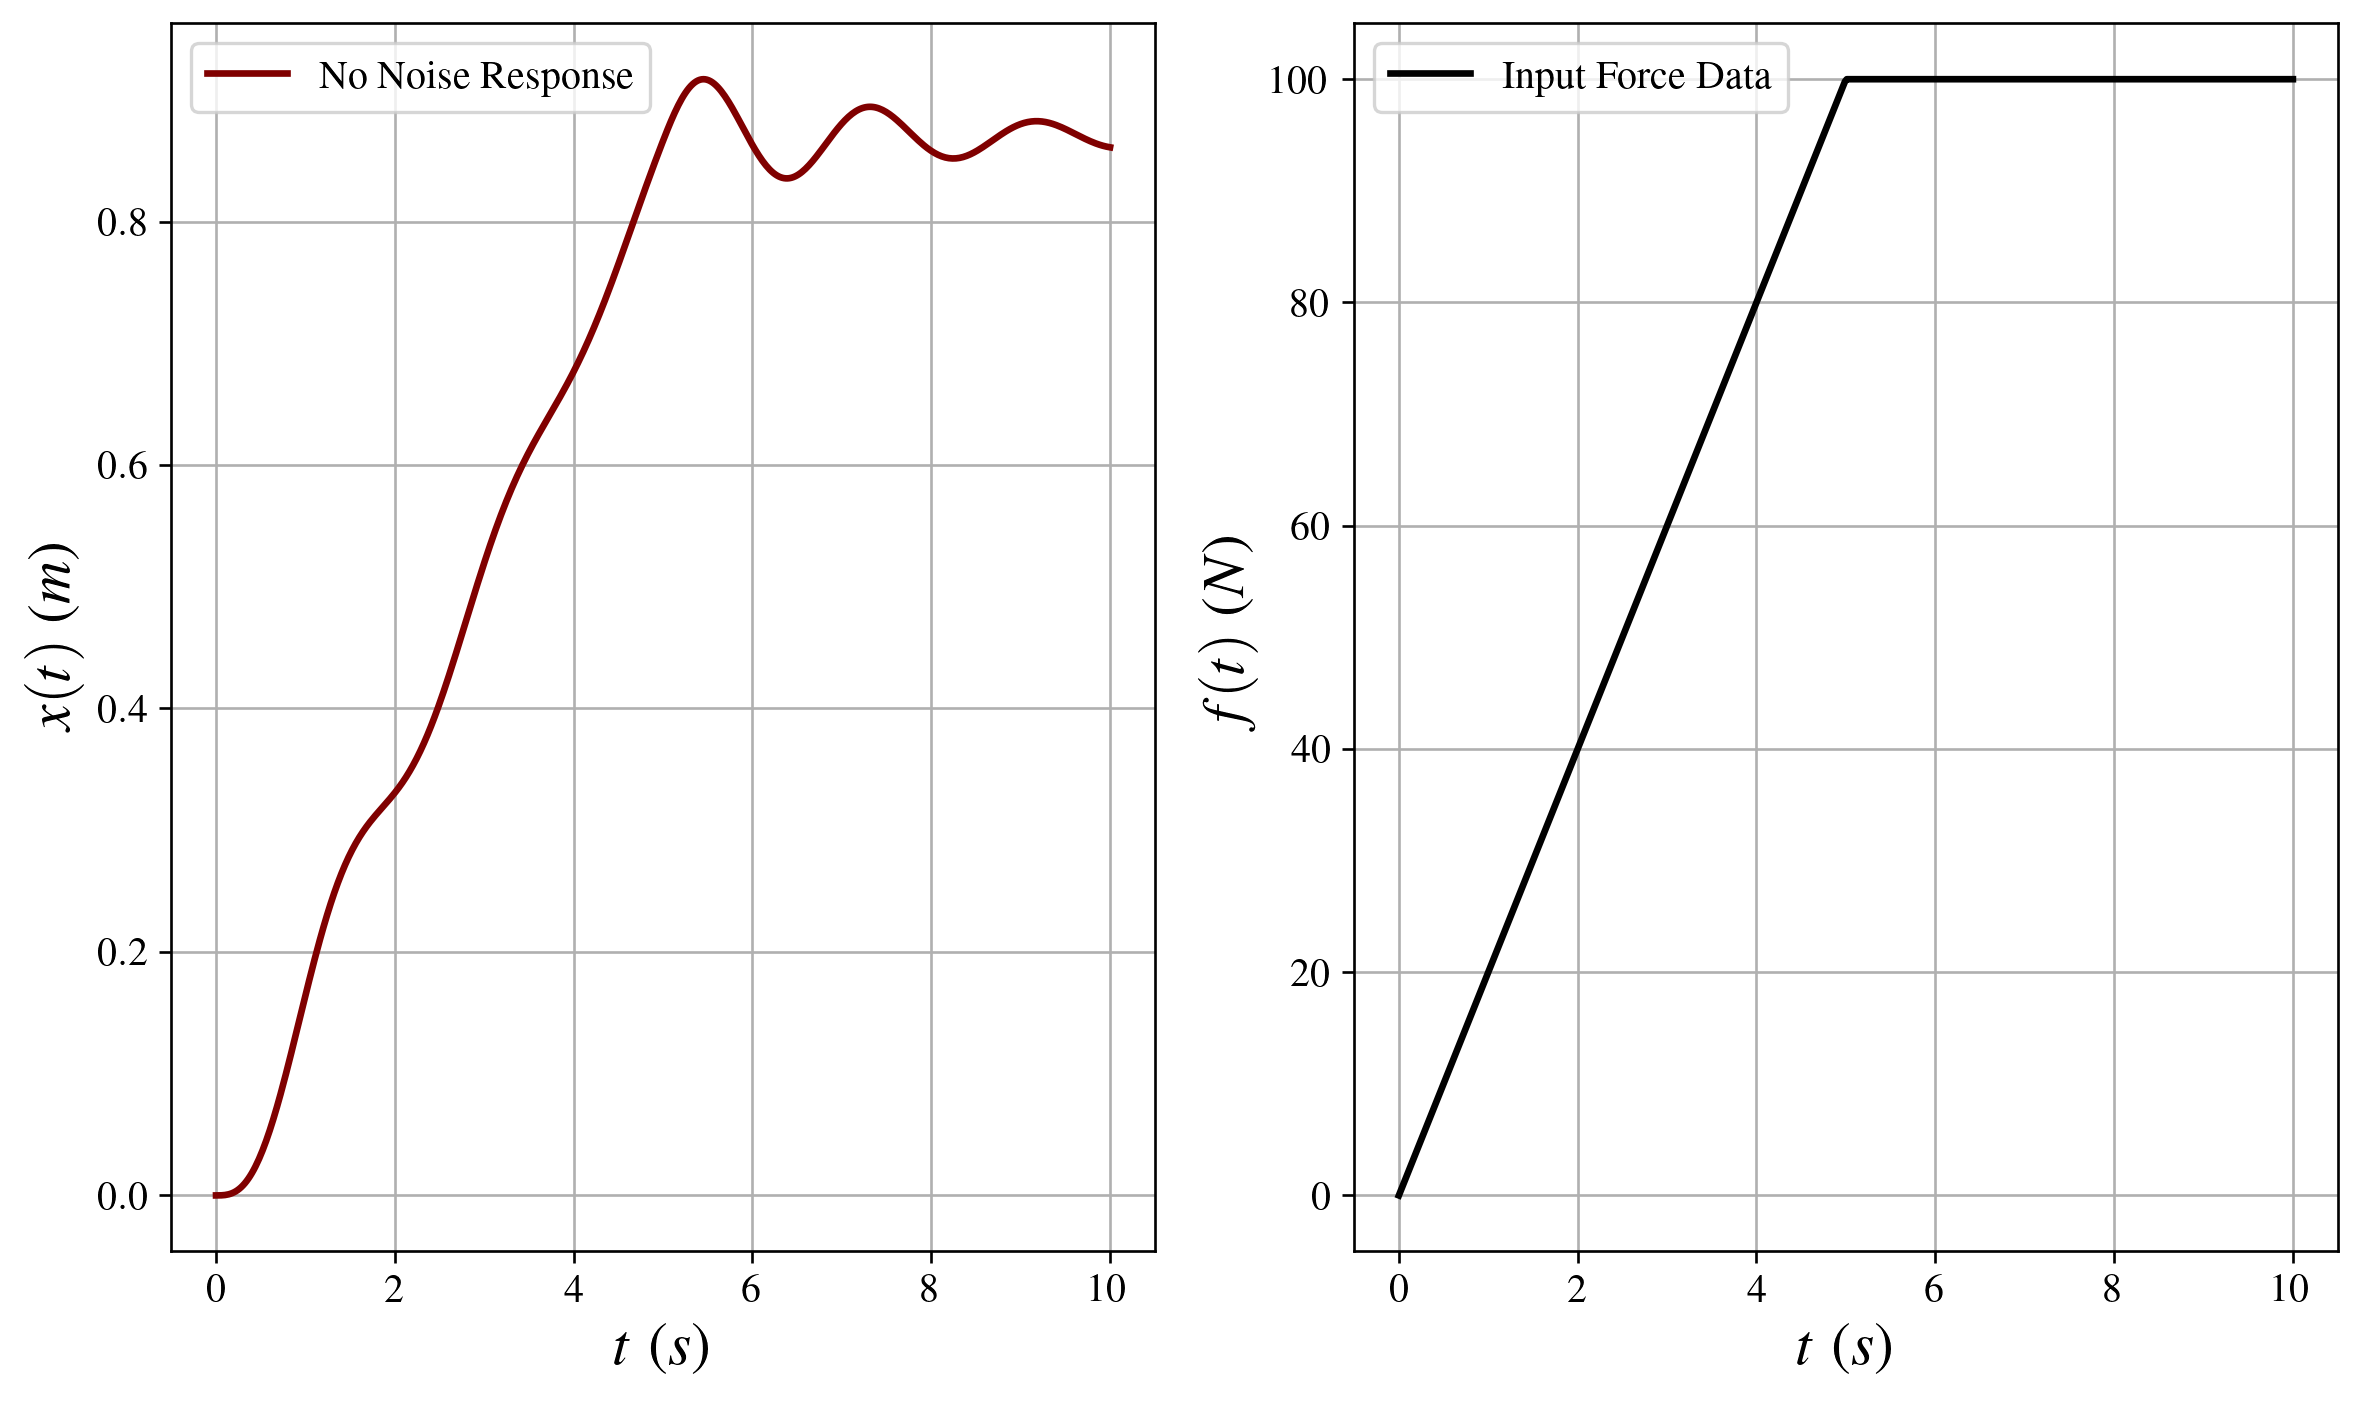

In [8]:
t, f_high, f_low, f_none = np.array(data['Time (s)']), np.array(data['High (N)']), np.array(data['Low (N)']), np.array(data['No Noise (N)'])
_, x_none = ct.forced_response(sys1, T=t, U=f_none)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].set_xlabel('$t$ ($s$)')
ax[1].set_xlabel('$t$ ($s$)')
ax[0].set_ylabel('$x(t)$ ($m$)')
ax[1].set_ylabel('$f(t)$ ($N$)')

ax[1].plot(t, f_none, label='Input Force Data', color='black')
ax[0].plot(t, x_none, label='No Noise Response')

ax[0].legend()
ax[1].legend()
# fig.savefig('No Noise.png')
plt.show()

### Part D

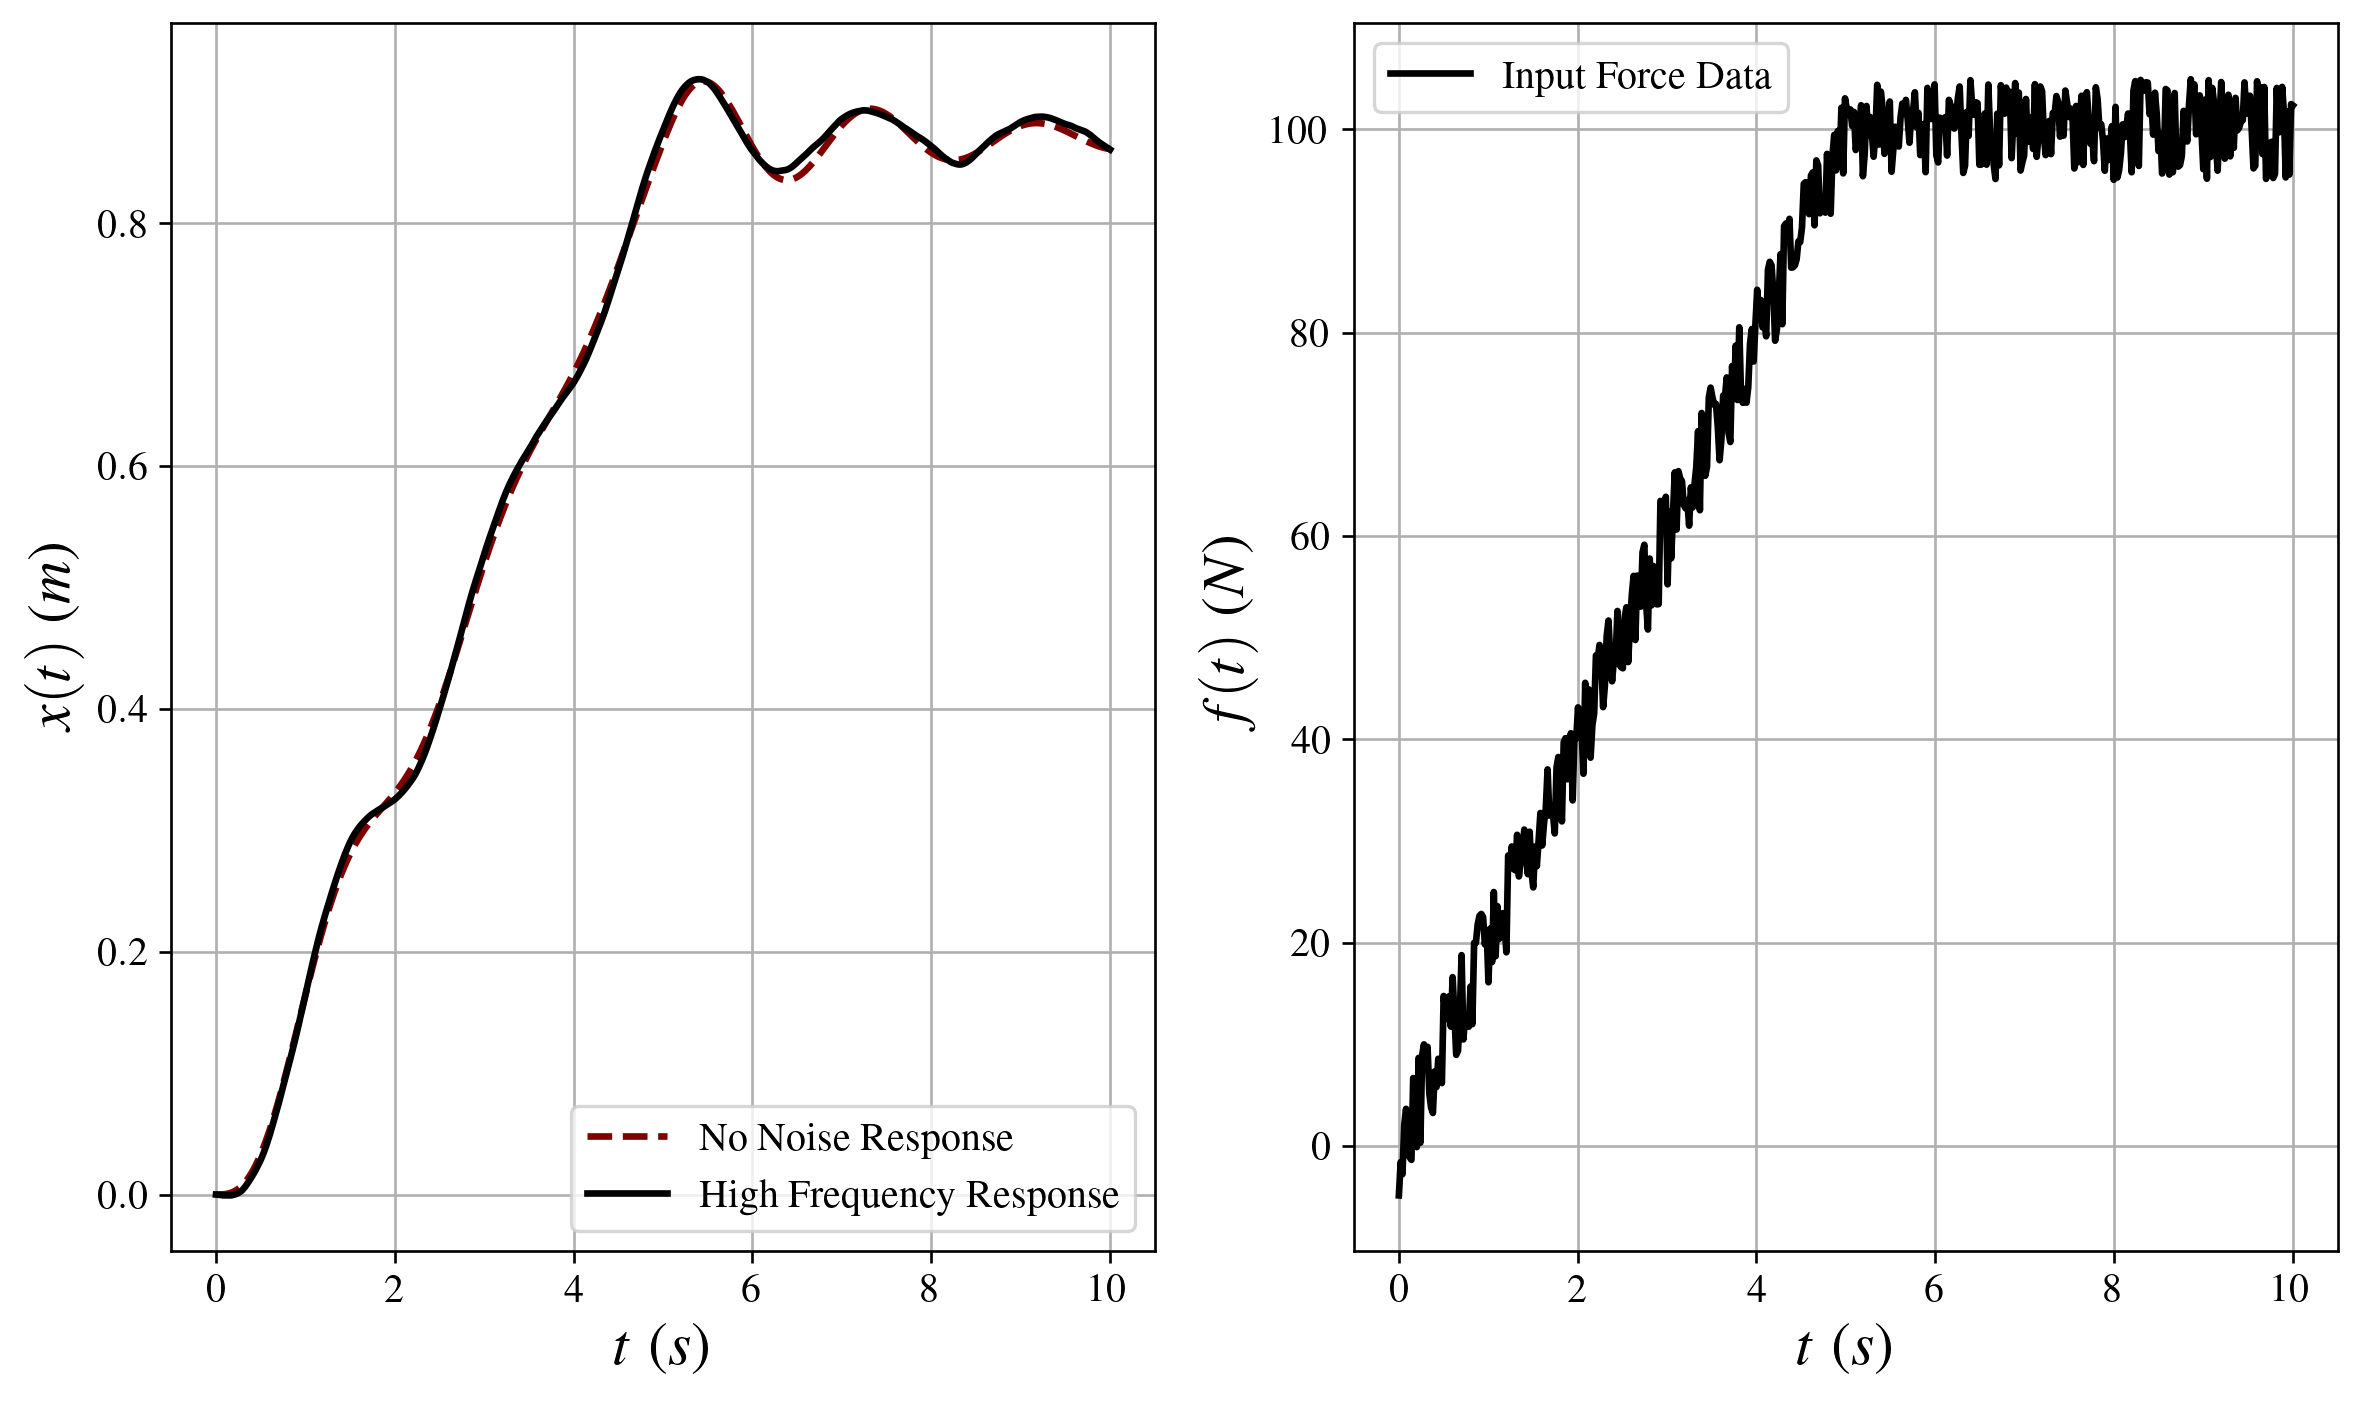

In [9]:
_, x_high = ct.forced_response(sys1, T=t, U=f_high)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].set_xlabel('$t$ ($s$)')
ax[1].set_xlabel('$t$ ($s$)')
ax[0].set_ylabel('$x(t)$ ($m$)')
ax[1].set_ylabel('$f(t)$ ($N$)')

ax[1].plot(t, f_high, label='Input Force Data', color='black')
ax[0].plot(t, x_none, label='No Noise Response', ls='--')
ax[0].plot(t, x_high, label='High Frequency Response')

ax[0].legend()
ax[1].legend()
# fig.savefig('High Frequency Noise.png')
plt.show()

### Part E

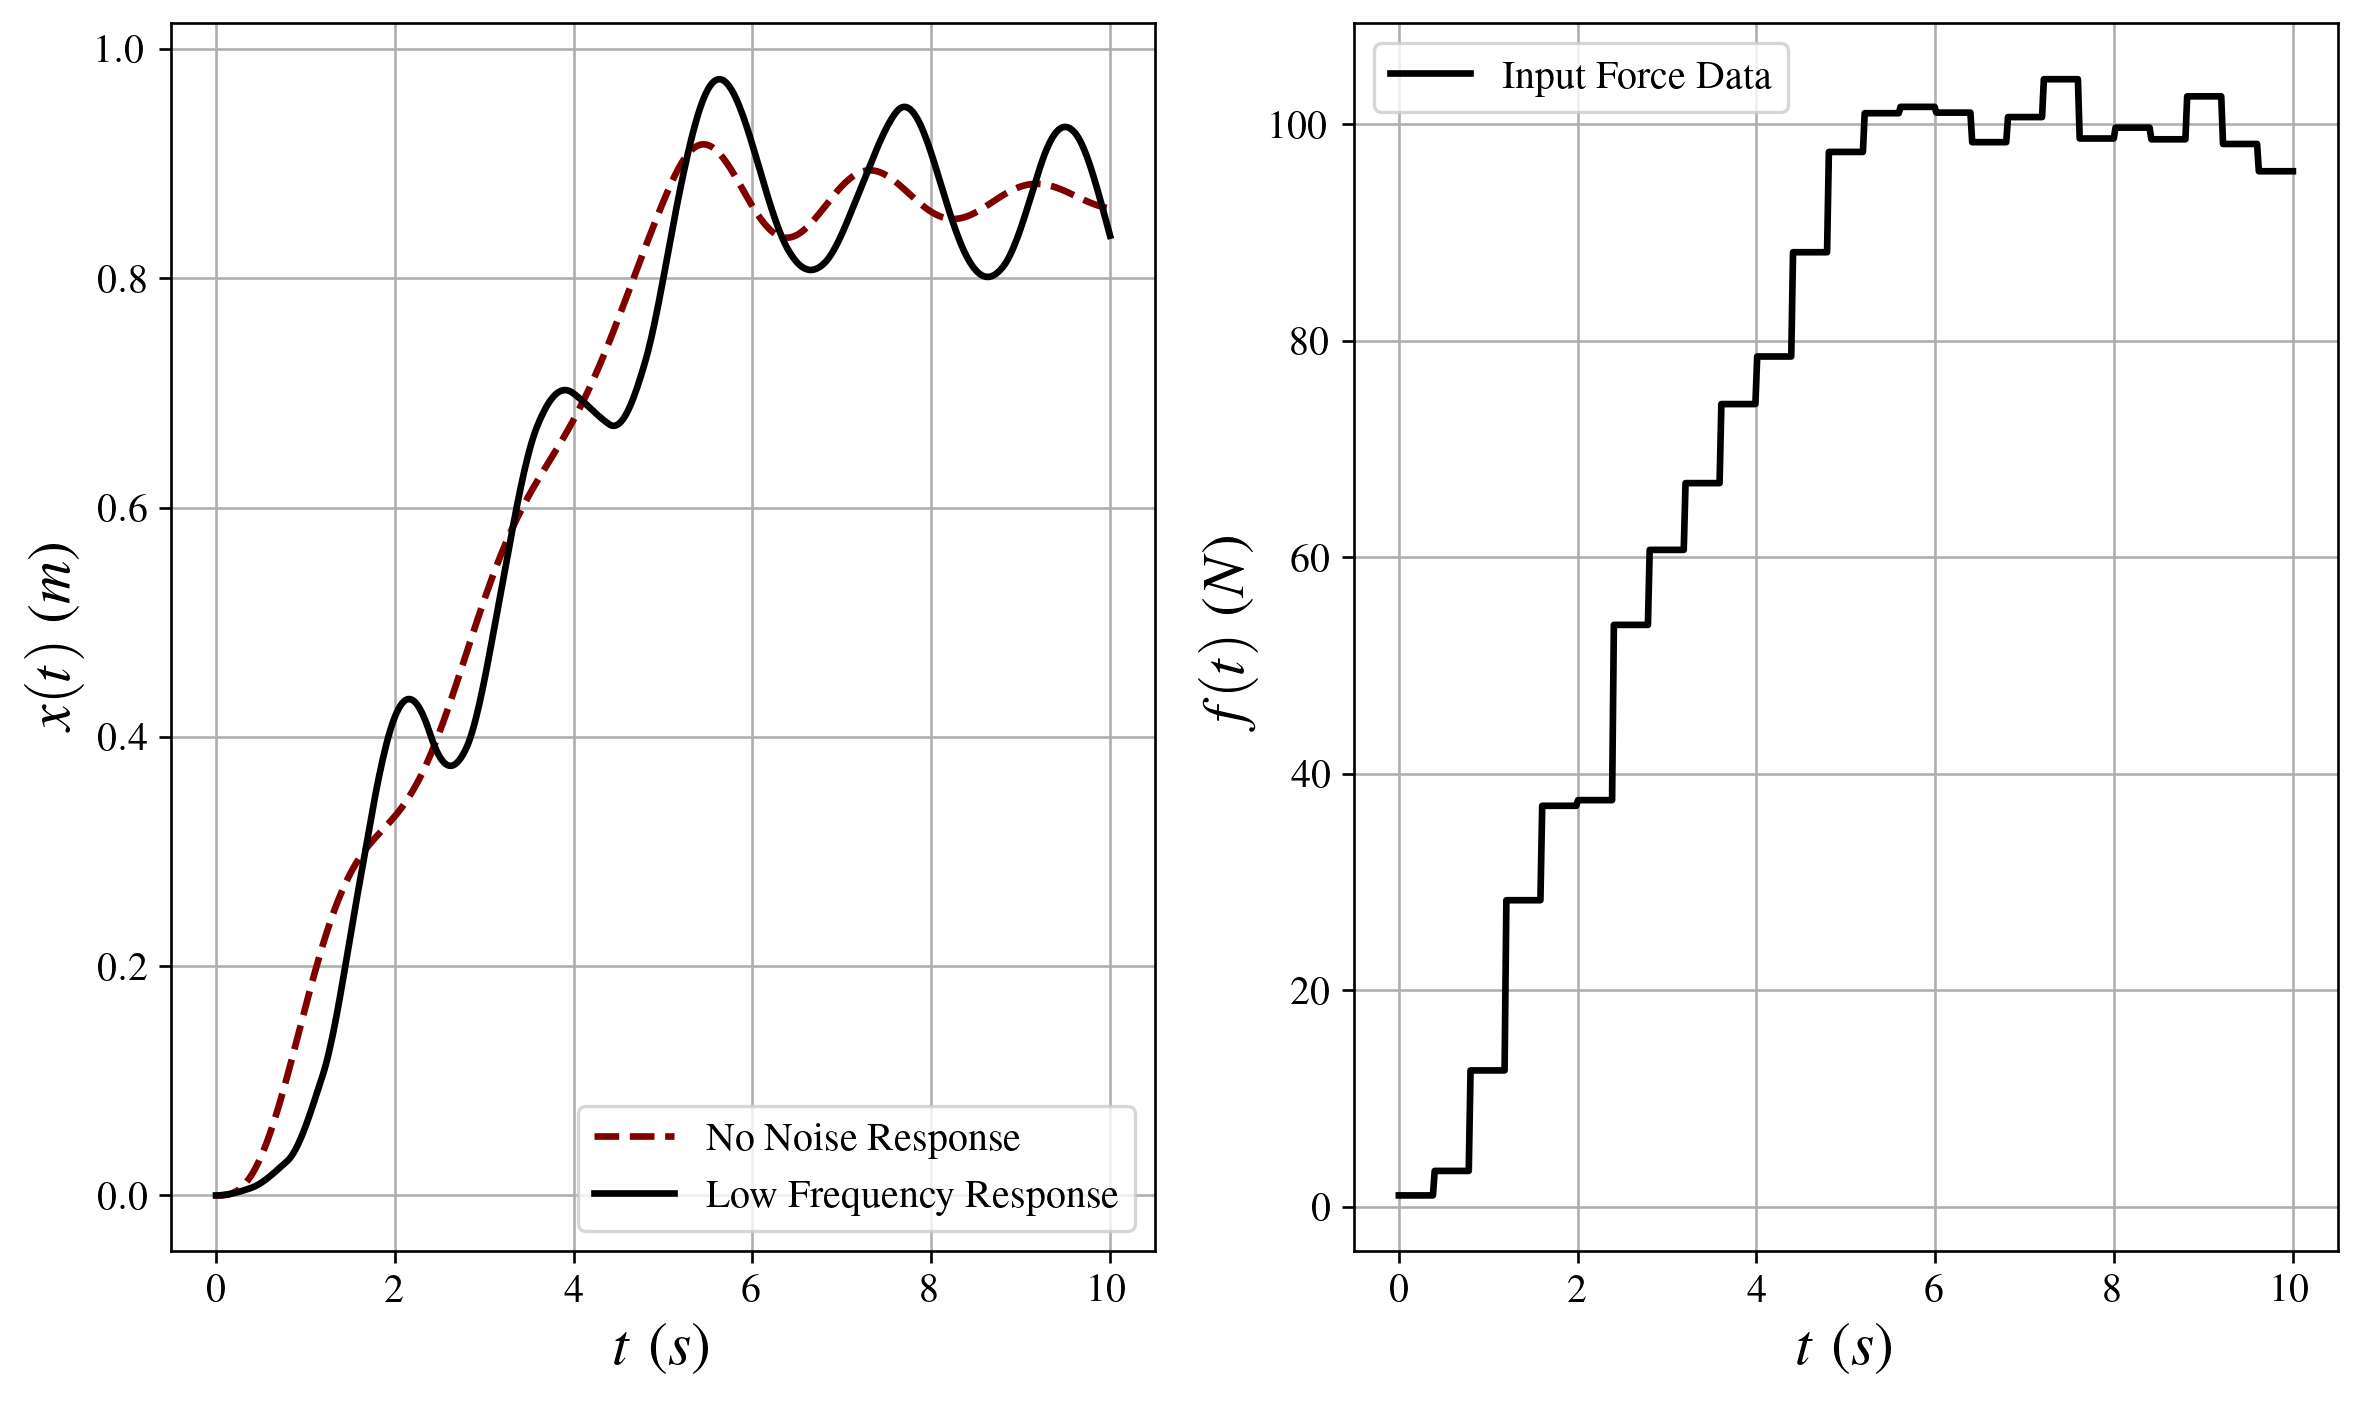

In [10]:
_, x_low = ct.forced_response(sys1, T=t, U=f_low)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].set_xlabel('$t$ ($s$)')
ax[1].set_xlabel('$t$ ($s$)')
ax[0].set_ylabel('$x(t)$ ($m$)')
ax[1].set_ylabel('$f(t)$ ($N$)')

ax[1].plot(t, f_low, label='Input Force Data', color='black')
ax[0].plot(t, x_none, label='No Noise Response', ls='--')
ax[0].plot(t, x_low, label='Low Frequency Response')

ax[0].legend()
ax[1].legend()
# fig.savefig('Low Frequency Noise.png')
plt.show()

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 3613 & Homework 3 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 2
## Given

![Figure 2](f2.PNG)

$$m_1=5\ kg,\ m_2=10\ kg$$

$$k_1=85\ N/m,\ k_2=30\ N/m,\ k_3=500\ N/m$$

$$c_1=4\ N\cdot s/m,\ c_2=3\ N\cdot s/m$$

$$f(t)=10^{-t}$$

The initial conditions are $x_0(0)=0.5$, $\dot{x_0}(0)=0$, $x_1(0)=0$, $\dot{x_1}(0)=0$.

## Find
a. Determine the equations of motion.
b. Put the system in the state-variable form.
c. Define a state-space object using `ct.ss`.
d. Plot the response $x_0(t)$ and $x_1(t)$ (first 10 seconds) on the same plot using the `ct.forced_response` function. You may check the solution using the `odeint` function as well.

## Solution
### Part A

In [11]:
t = sp.Symbol('t')
x0, x1 = sp.Function('x_0')(t), sp.Function('x_1')(t)

eq1 = sp.Eq(5*x0.diff(t, 2), -85*x0 - 4*x0.diff() + 500*(x1 - x0))
eq2 = sp.Eq(10*x1.diff(t, 2), 500*(x0 - x1) - 30*x1 - 3*x1.diff() + 10**(-t))
display(eq1, eq2)

Eq(5*Derivative(x_0(t), (t, 2)), -585*x_0(t) + 500*x_1(t) - 4*Derivative(x_0(t), t))

Eq(10*Derivative(x_1(t), (t, 2)), 500*x_0(t) - 530*x_1(t) - 3*Derivative(x_1(t), t) + 10**(-t))

### Part B

In [12]:
# Define new x2 and x3 functions
x2, x3 = sp.Function('x_2')(t), sp.Function('x_3')(t)

# Define two new equations
eq3 = sp.Eq(x0.diff(), x2)
eq4 = sp.Eq(x1.diff(), x3)

# Make substitutions to the first two equations
subs = [
    (x0.diff(t, 2), x2.diff()),
    (x0.diff(), x2),
    (x1.diff(t, 2), x3.diff()),
    (x1.diff(), x3)
]
eq1 = eq1.subs(subs)
eq2 = eq2.subs(subs)

# Solve it
state_sol = sp.solve([eq1, eq2, eq3, eq4], (x0.diff(), x1.diff(), x2.diff(), x3.diff()), dict=True)[0]
for key, value in state_sol.items():
    display(sp.Eq(key, value))

Eq(Derivative(x_0(t), t), x_2(t))

Eq(Derivative(x_1(t), t), x_3(t))

Eq(Derivative(x_2(t), t), -117*x_0(t) + 100*x_1(t) - 4*x_2(t)/5)

Eq(Derivative(x_3(t), t), 50*x_0(t) - 53*x_1(t) - 3*x_3(t)/10 + 1/(10*10**t))

In [13]:
f_lamb = lambda t_: 10**(-t_)
def state_vars(x_, t_):
    return [
        x_[2],
        x_[3],
        -117*x_[0] + 100*x_[1] - 4/5*x_[2],
        50*x_[0] - 53*x_[1] - 3/10*x_[3] + 1/10*f_lamb(t_)
    ]

Note: The state variable model should have no derivatives on the right hand side of each equation.

### Part C

In [14]:
A = [
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [-117, 100, -4/5, 0],
    [50, -53, 0, -3/10]
]

B = [
    [0],
    [0],
    [0],
    [1/10]
]

C = [
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
]

D = [
    [0],
    [0],
    [0],
    [0]
]

sys1 = ct.ss(A, B, C, D)
sys1

<LinearIOSystem:sys[6]:['u[0]']->['y[0]', 'y[1]', 'y[2]', 'y[3]']>

### Part D

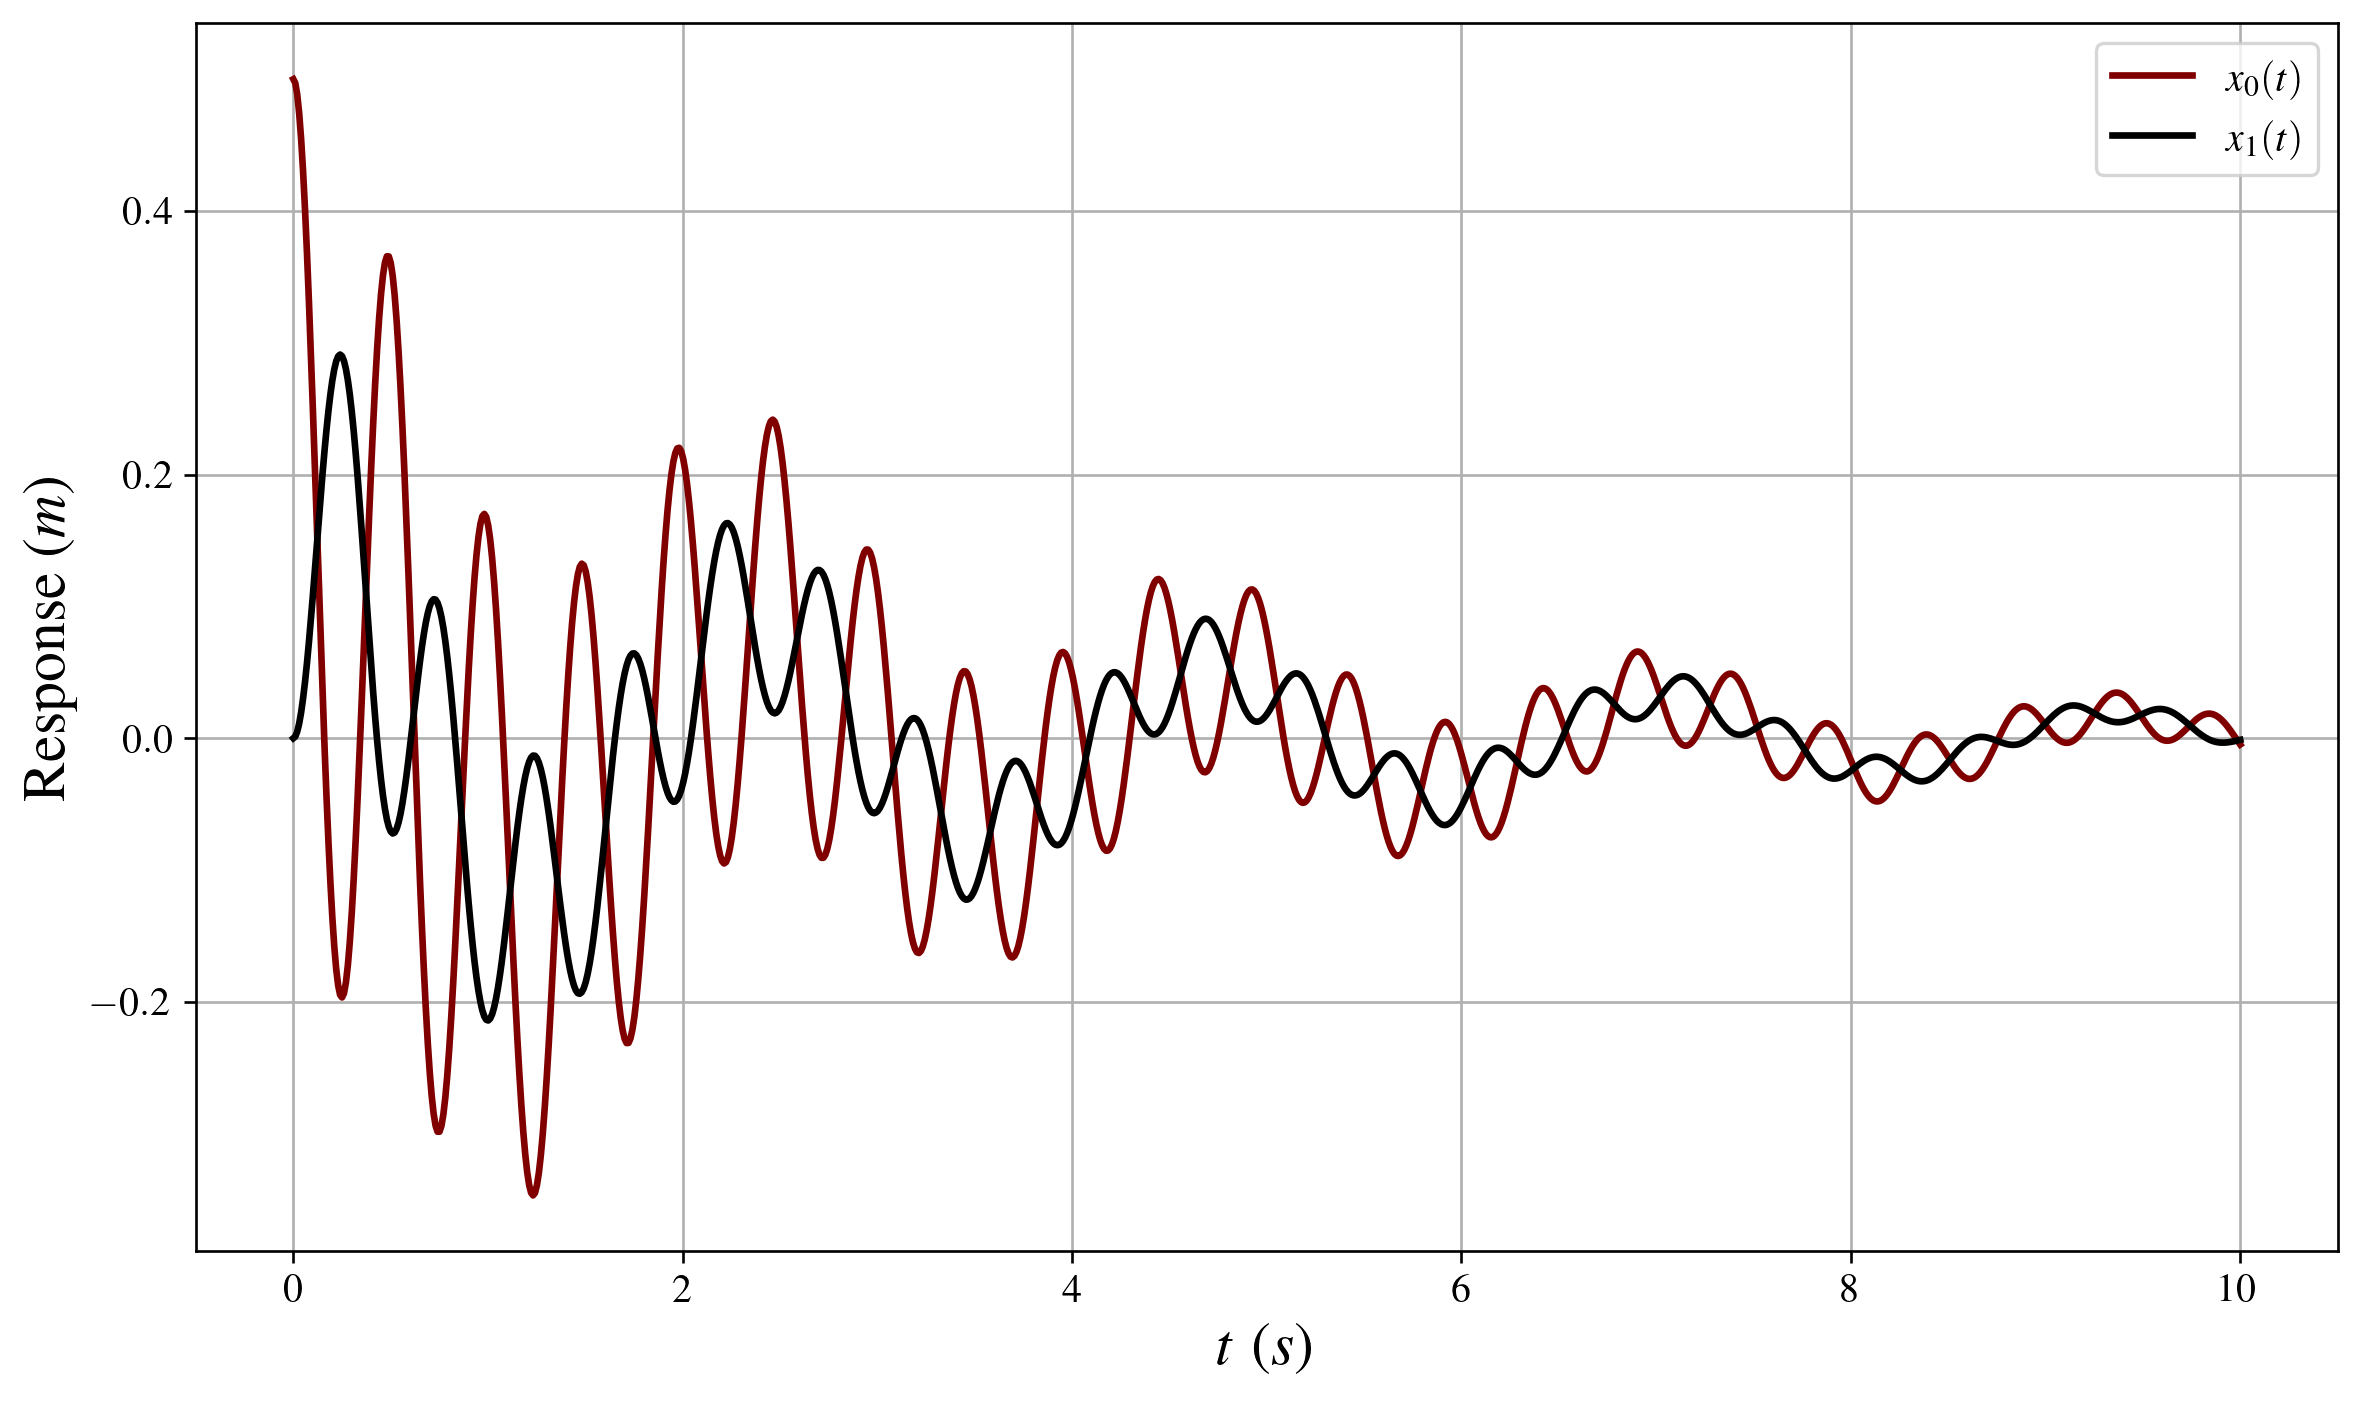

In [15]:
t_array = np.linspace(0, 10, 1000)
_, x_response = ct.forced_response(sys1, T=t_array, U=f_lamb(t_array), X0=(0.5, 0, 0, 0))

# Just for checking
# from scipy.integrate import odeint
# sol = odeint(state_vars, (0.5, 0, 0, 0), t_array)

plt.plot(t_array, x_response[0], label='$x_0(t)$')
# plt.plot(t_array, sol[:, 0], ls='--')
plt.plot(t_array, x_response[1], label='$x_1(t)$')
# plt.plot(t_array, sol[:, 1], ls='--')

plt.xlabel('$t$ ($s$)')
plt.ylabel('Response ($m$)')
plt.legend()
# plt.savefig('Responses.png')
plt.show()